In [9]:
from sklearn.linear_model import Ridge

from model_utils import load_dataset, run_experiment, print_results, plot_residuals

In [10]:
dataset = load_dataset()

100%|██████████████████████████████████████████████████████████████████████████████████| 23/23 [00:18<00:00,  1.22it/s]


In [11]:
for test_score in ['sat_math', 'sat_ebrw']:
    dataset['testscores;{}_delta'.format(test_score)] = \
        dataset.apply(lambda r: r['testscores;{}_2022'.format(test_score)] - r['testscores;{}_2019'.format(test_score)],
                      axis=1)

In [12]:
dataset

,engagement;pct_access,engagement;engagement_index,districts;locale,districts;state,broadband;wired_over_25,broadband;avg_mbps,broadband;frac_access,broadband;lowest_price,districts;pct_black/hispanic,districts;pct_free/reduced,...,engagement;avg_LC_CM_SDO,engagement;avg_Missing,engagement;avg_SDO,engagement;med_CM,engagement;med_LC,engagement;med_LC_CM_SDO,engagement;med_Missing,engagement;med_SDO,testscores;sat_math_delta,testscores;sat_ebrw_delta
9007,1.964617,567.28607,City,Arizona,0.82173,24.11994,0.23648,15.5471,4,NaN,...,295.944008,374.427829,2338.686585,23.710,23.40,25.860,7.54,37.720,12,14
1570,0.518174,84.132317,Suburb,California,1.23725,23.10062,0.2465,9.0179,1,1.0,...,89.129722,44.883813,692.672180,9.160,9.66,11.660,2.00,33.585,24,26
2074,0.109114,34.732466,Suburb,California,1.23725,23.10062,0.2465,9.0179,2,1.0,...,122.338390,20.543905,27.147659,1.670,2.28,2.470,0.45,1.800,24,26
2106,0.207801,66.760789,Suburb,California,1.23725,23.10062,0.2465,9.0179,1,0.0,...,91.751692,29.122240,186.552288,6.780,3.79,9.625,1.66,3.150,24,26
2172,0.81368,282.176262,City,California,1.36228,23.72792,0.2486,8.72419,0,0.0,...,434.938842,71.329144,2197.199267,7.755,10.40,19.130,1.46,9.005,24,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5510,0.141797,24.367871,City,Washington,1.05923,21.19728,0.24797,14.27715,1,2.0,...,75.974488,14.229446,384.795328,0.740,1.76,1.150,0.19,2.170,7,15
7457,0.312187,73.94003,City,Washington,1.05923,21.19728,0.24797,14.27715,2,2.0,...,116.242942,28.350720,636.227558,1.130,2.88,3.580,0.35,3.710,7,15
5987,0.730825,181.37924,Suburb,Wisconsin,1.19913,19.45233,0.24867,10.4515,0,0.0,...,473.230489,85.381382,1325.292925,7.370,6.88,21.180,1.84,14.800,-19,-13
7752,0.560572,117.393178,Suburb,Wisconsin,1.19913,19.45233,0.24867,10.4515,0,0.0,...,496.962987,91.637230,145.666562,3.850,7.03,10.745,1.52,6.810,-19,-13


In [18]:
TARGETS = ['testscores;sat_math_delta', 
           'testscores;sat_ebrw_delta']

<a id='baselines'></a>

# BASELINE REGRESSION MODELS

Average the entire year of data for each district. Same model is used for all states.

This yields only ~173-176 rows, so we use k-fold Cross Validation to measure model performance. _Note that the folds are constructed to ensure that all data from a given state is in either the test or train split._

### SAT Score Baselines

Each baseline trains 2 Ridge regression models ($\alpha = 0.5$), one for math and one for reading/writing SAT scores, using 5-fold cross-validation. 

- ___Baseline 1a___: Uses engagement data only. ([Model](#baseline1a_model) / [Results](#baseline1a_results))
- ___Baseline 1b___: Uses average engagement data only, split into product types. Performed comparably to Baseline 1a. ([Model](#baseline1b_model) / [Results](#baseline1b_results))
- ___Baseline 1c___: Uses median engagement data only, split into product types. Outperformed by Baselines 1a and 1b. ([Model](#baseline1c_model) / [Results](#baseline1c_results))
- ___Baseline 2___: Uses locale type only. Outperformed Baseline 1a/b/c. ([Model](#baseline2_model) / [Results](#baseline2_results))
- ___Baseline 3___: Uses broadband data only. Outperformed by Baseline 1a/b/c. ([Model](#baseline3_model) / [Results](#baseline3_results))
- ___Baseline 4___: Uses socioeconomic data only. Performed relatively well with the caveat that it uses a much smaller dataset than the other baselines due to missing data. ([Model](#baseline4_model) / [Results](#baseline4_results))


<a id='baseline1a_model'></a>

## Baseline 1a: Predict Math and Reading Scores from Engagement Data Only (All product types combined)

[(Back to top)](#baselines)

In [20]:
FEATURES = ['engagement;pct_access', 
            'engagement;engagement_index']

five_fold_results = run_experiment(dataset, 
                                   FEATURES,
                                   TARGETS,
                                   Ridge(alpha=0.5), 
                                   n_splits=5)


Dataset for testscores;sat_math_delta has 176 samples after filtering
Dataset for testscores;sat_ebrw_delta has 176 samples after filtering


### Baseline 1a Training Results

In [21]:
print_results(five_fold_results)

,testscores;sat_math_delta
train_r2,0.0305
train_root_mean_squared_error,12.1301


,testscores;sat_ebrw_delta
train_r2,0.0256
train_root_mean_squared_error,12.3084


<a id='baseline1a_results'></a>

### Baseline 1a Testing Results

[(Back to top)](#baselines)

In [22]:
print_results(five_fold_results, splits=['test'])

,testscores;sat_math_delta
test_r2,-0.2175
test_root_mean_squared_error,12.2982


testscores;sat_math_delta: 12.2982


,testscores;sat_ebrw_delta
test_r2,-0.2659
test_root_mean_squared_error,12.6457


testscores;sat_ebrw_delta: 12.6457


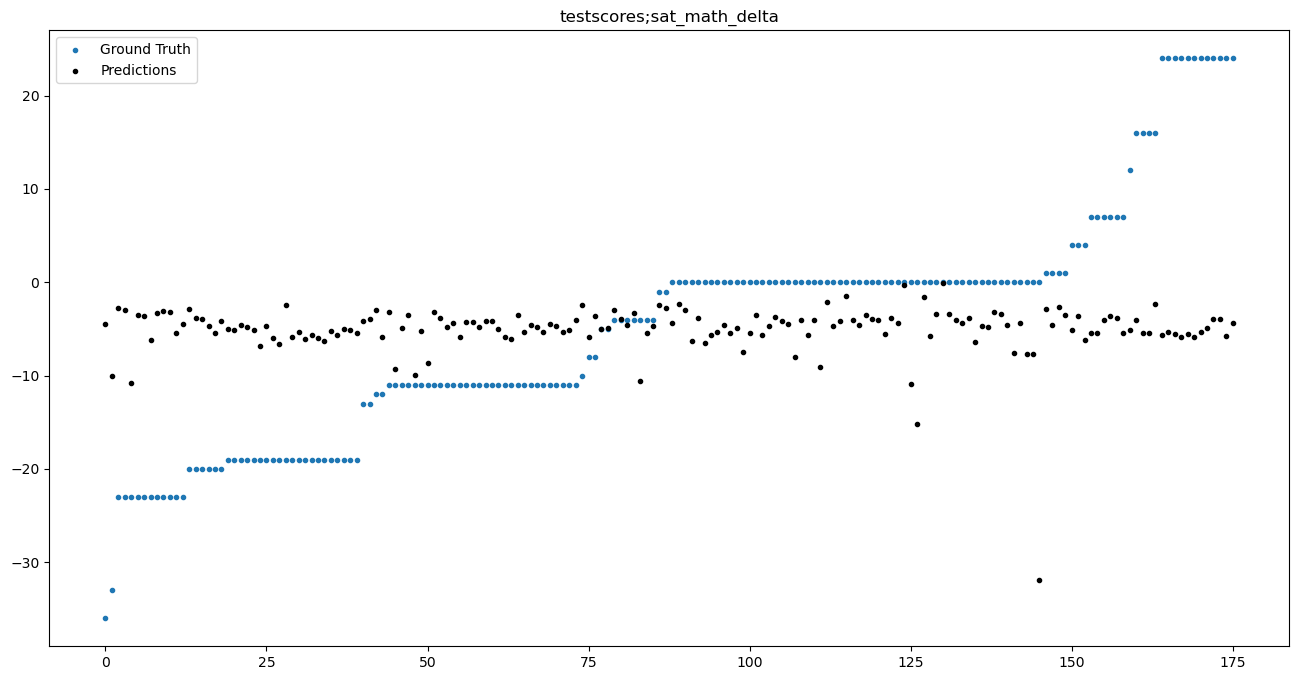

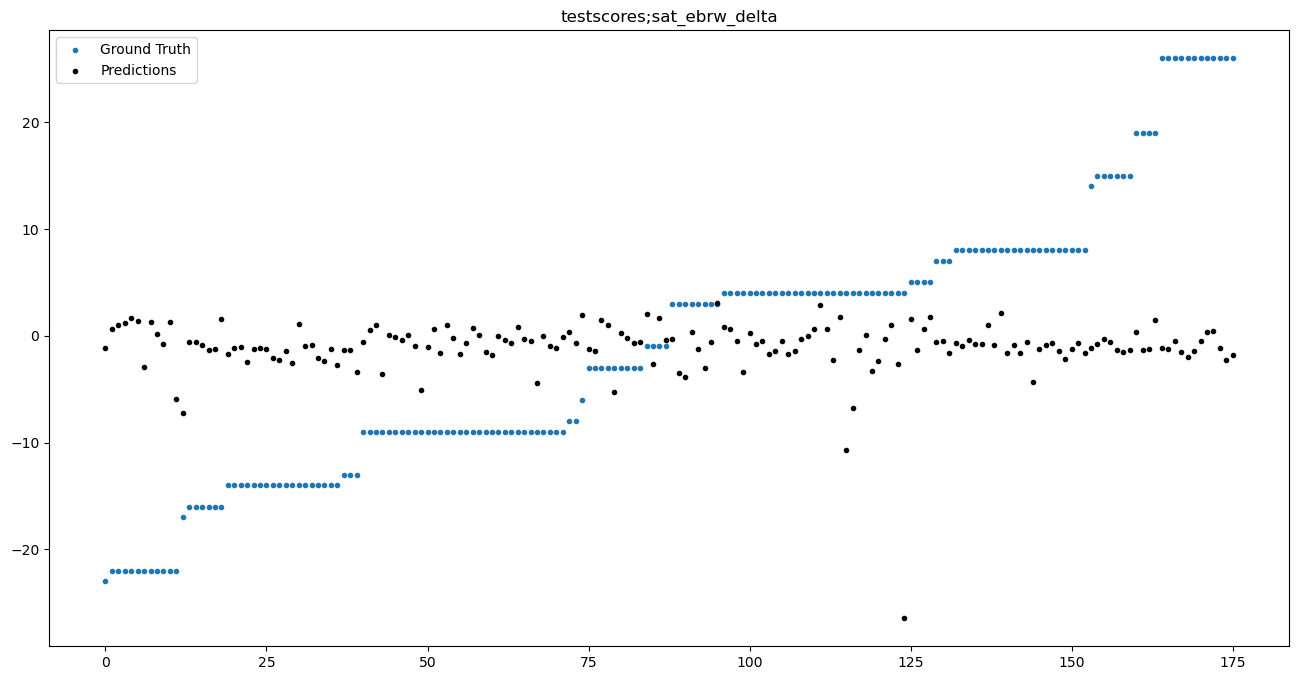

In [23]:
plot_residuals(five_fold_results, None)

<a id='baseline1b_model'></a>

## Baseline 1b: Predict Math and Reading Scores from Engagement Data Only

[(Back to top)](#baselines)

In [24]:
FEATURES = ['engagement;avg_SDO',
            'engagement;avg_CM',
            'engagement;avg_LC', 
            'engagement;avg_LC_CM_SDO', 
            'engagement;avg_Missing']

five_fold_results = run_experiment(dataset, 
                                   FEATURES,
                                   TARGETS,
                                   Ridge(alpha=0.5), 
                                   n_splits=5)


Dataset for testscores;sat_math_delta has 176 samples after filtering
Dataset for testscores;sat_ebrw_delta has 176 samples after filtering


### Baseline 1b Training Results

In [25]:
print_results(five_fold_results)

,testscores;sat_math_delta
train_r2,0.0568
train_root_mean_squared_error,11.9665


,testscores;sat_ebrw_delta
train_r2,0.0502
train_root_mean_squared_error,12.1511


<a id='baseline1b_results'></a>

### Baseline 1b Testing Results

[(Back to top)](#baselines)

In [26]:
print_results(five_fold_results, splits=['test'])

,testscores;sat_math_delta
test_r2,-0.2121
test_root_mean_squared_error,12.4273


testscores;sat_math_delta: 12.4273


,testscores;sat_ebrw_delta
test_r2,-0.3215
test_root_mean_squared_error,13.0482


testscores;sat_ebrw_delta: 13.0482


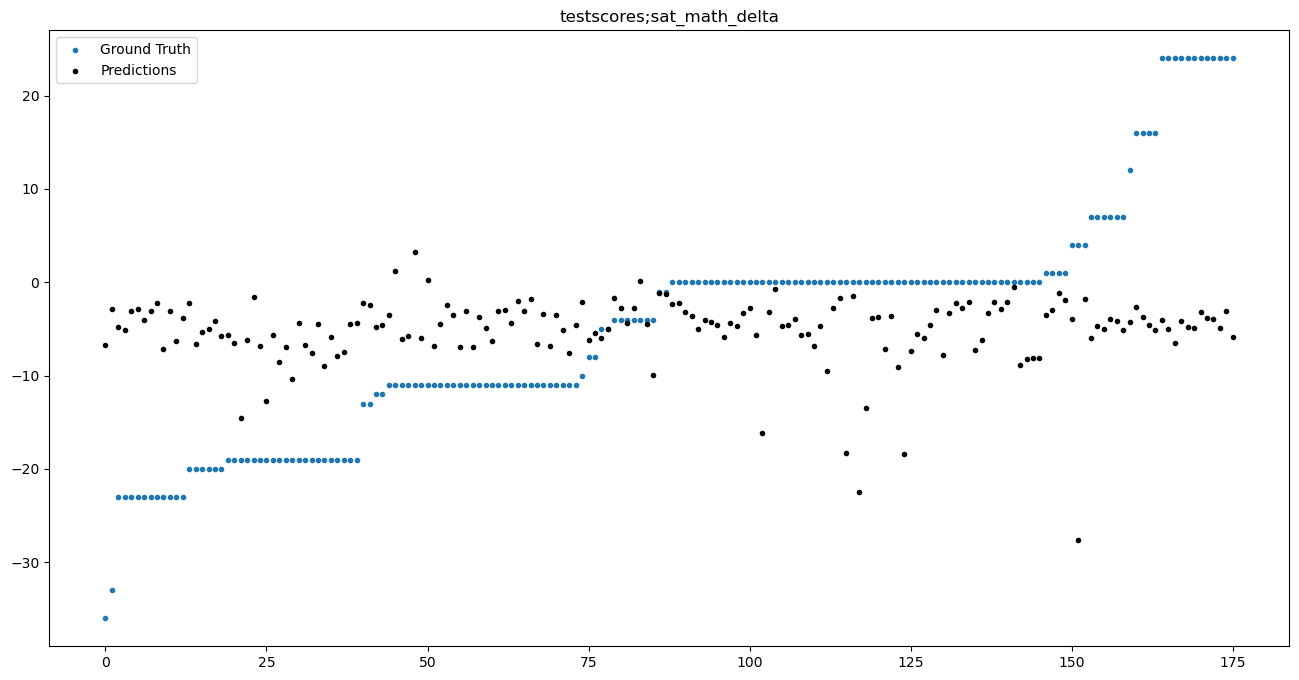

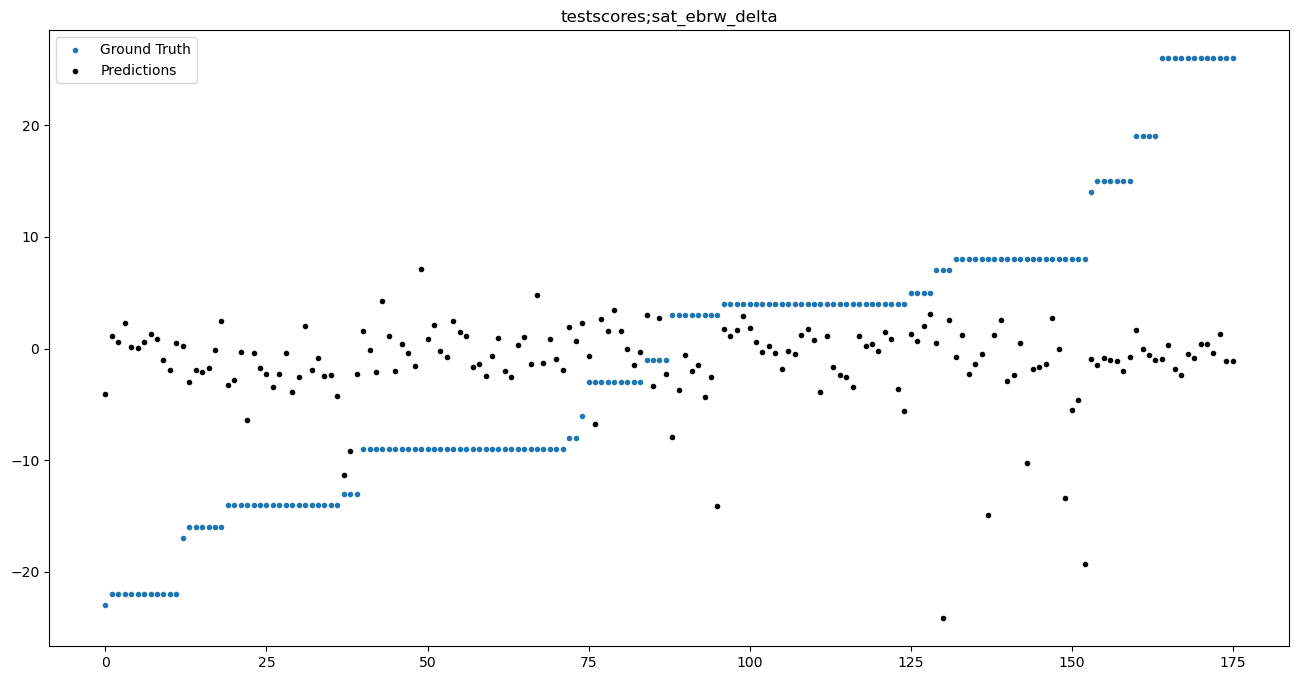

In [27]:
plot_residuals(five_fold_results, None)

<a id='baseline1c_model'></a>

## Baseline 1c: Predict Math and Reading Scores from Engagement Data Only

[(Back to top)](#baselines)

In [28]:
FEATURES = ['engagement;med_SDO',
            'engagement;med_CM',
            'engagement;med_LC', 
            'engagement;med_LC_CM_SDO', 
            'engagement;med_Missing']

five_fold_results = run_experiment(dataset, 
                                   FEATURES,
                                   TARGETS,
                                   Ridge(alpha=0.5), 
                                   n_splits=5)


Dataset for testscores;sat_math_delta has 176 samples after filtering
Dataset for testscores;sat_ebrw_delta has 176 samples after filtering


### Baseline 1c Training Results

In [29]:
print_results(five_fold_results)

,testscores;sat_math_delta
train_r2,0.0170
train_root_mean_squared_error,12.2198


,testscores;sat_ebrw_delta
train_r2,0.012
train_root_mean_squared_error,12.397


<a id='baseline1c_results'></a>

### Baseline 1c Testing Results

[(Back to top)](#baselines)

In [30]:
print_results(five_fold_results, splits=['test'])

,testscores;sat_math_delta
test_r2,-0.6311
test_root_mean_squared_error,13.3821


testscores;sat_math_delta: 13.3821


,testscores;sat_ebrw_delta
test_r2,-0.6192
test_root_mean_squared_error,13.6473


testscores;sat_ebrw_delta: 13.6473


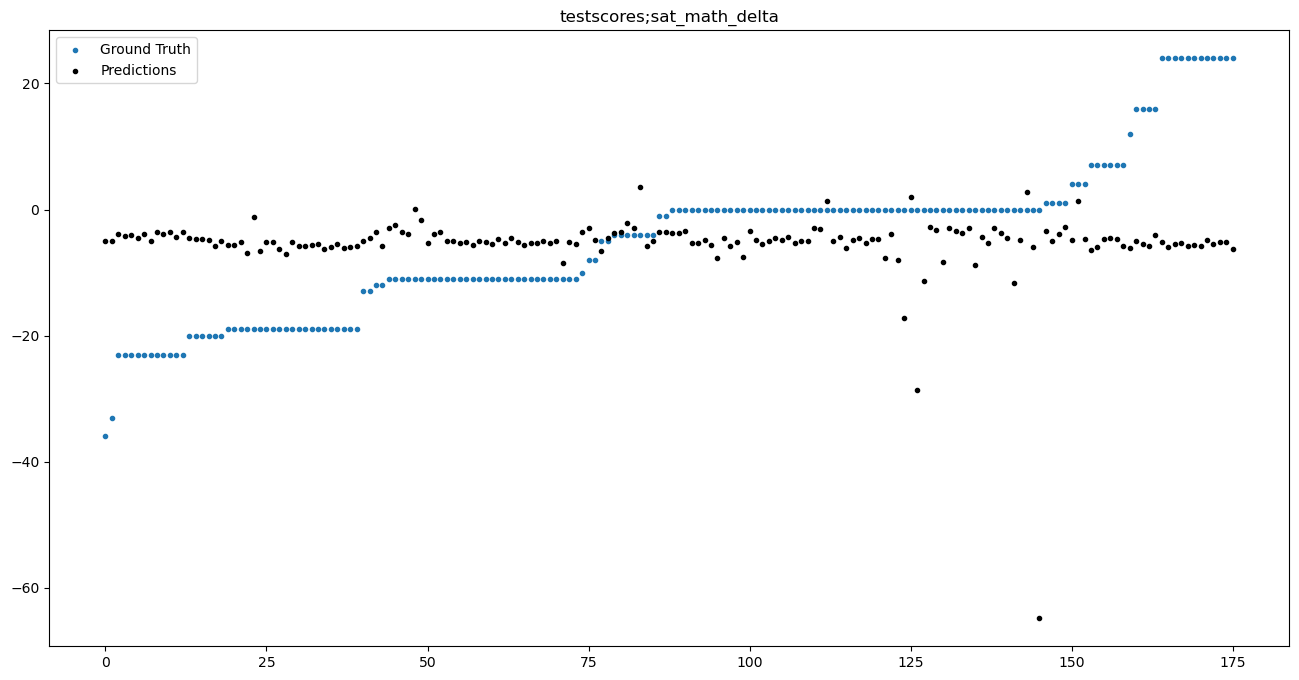

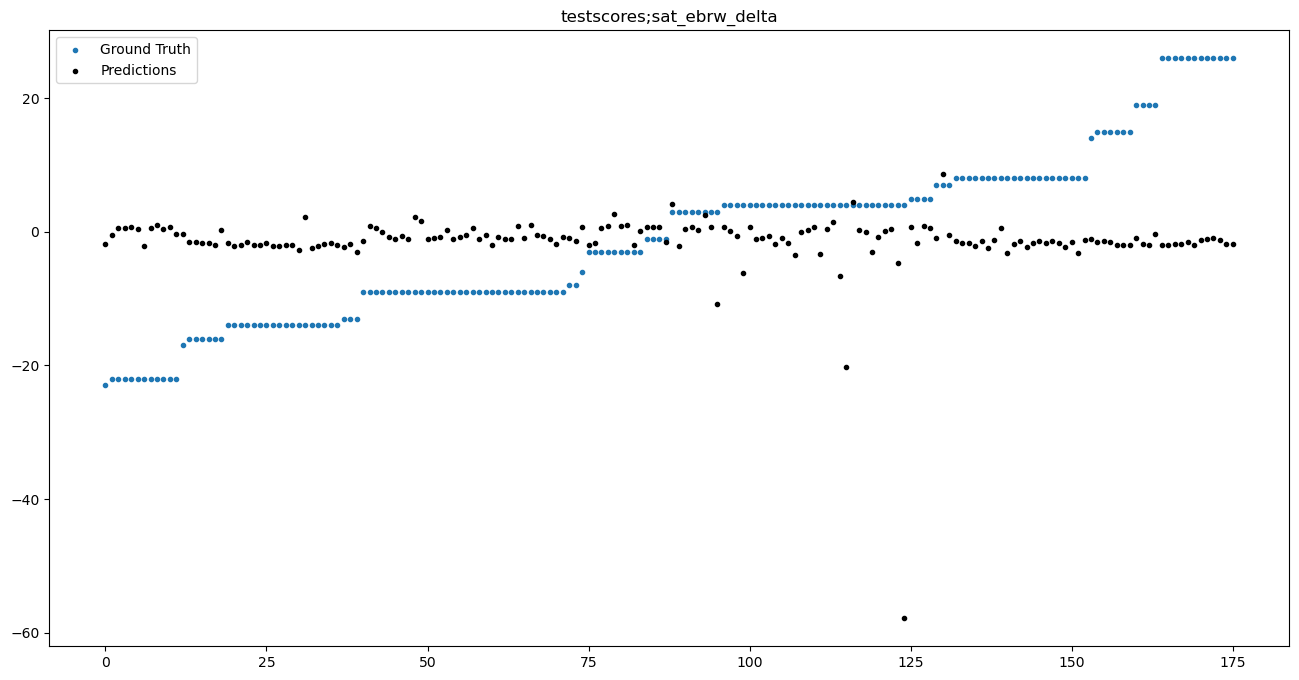

In [31]:
plot_residuals(five_fold_results, None)

<a id='baseline2_model'></a>

## Baseline 2: Predict Math and Reading Scores from Locale Type Only

[(Back to top)](#baselines)

In [32]:
FEATURES = ['districts;locale_city', 
            'districts;locale_suburb', 
            'districts;locale_town',
            'districts;locale_rural']

five_fold_results = run_experiment(dataset, 
                                   FEATURES,
                                   TARGETS,
                                   Ridge(alpha=0.5), 
                                   n_splits=5)
    

Dataset for testscores;sat_math_delta has 176 samples after filtering
Dataset for testscores;sat_ebrw_delta has 176 samples after filtering


### Baseline 2 Training Results

In [33]:
print_results(five_fold_results)

,testscores;sat_math_delta
train_r2,0.1296
train_root_mean_squared_error,11.4676


,testscores;sat_ebrw_delta
train_r2,0.1135
train_root_mean_squared_error,11.7201


<a id='baseline2_results'></a>

### Baseline 2 Testing Results

[(Back to top)](#baselines)

In [34]:
print_results(five_fold_results, splits=['test'])

,testscores;sat_math_delta
test_r2,-0.2886
test_root_mean_squared_error,12.1917


testscores;sat_math_delta: 12.1917


,testscores;sat_ebrw_delta
test_r2,-0.3880
test_root_mean_squared_error,12.7552


testscores;sat_ebrw_delta: 12.7552


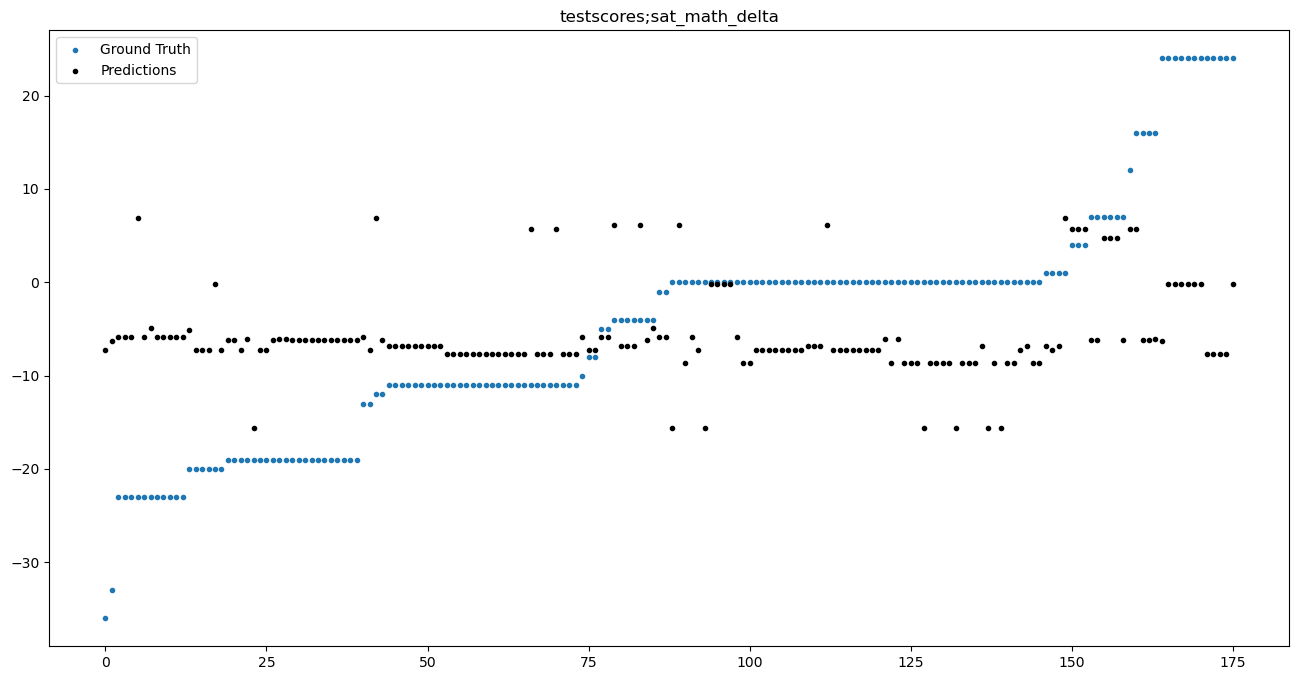

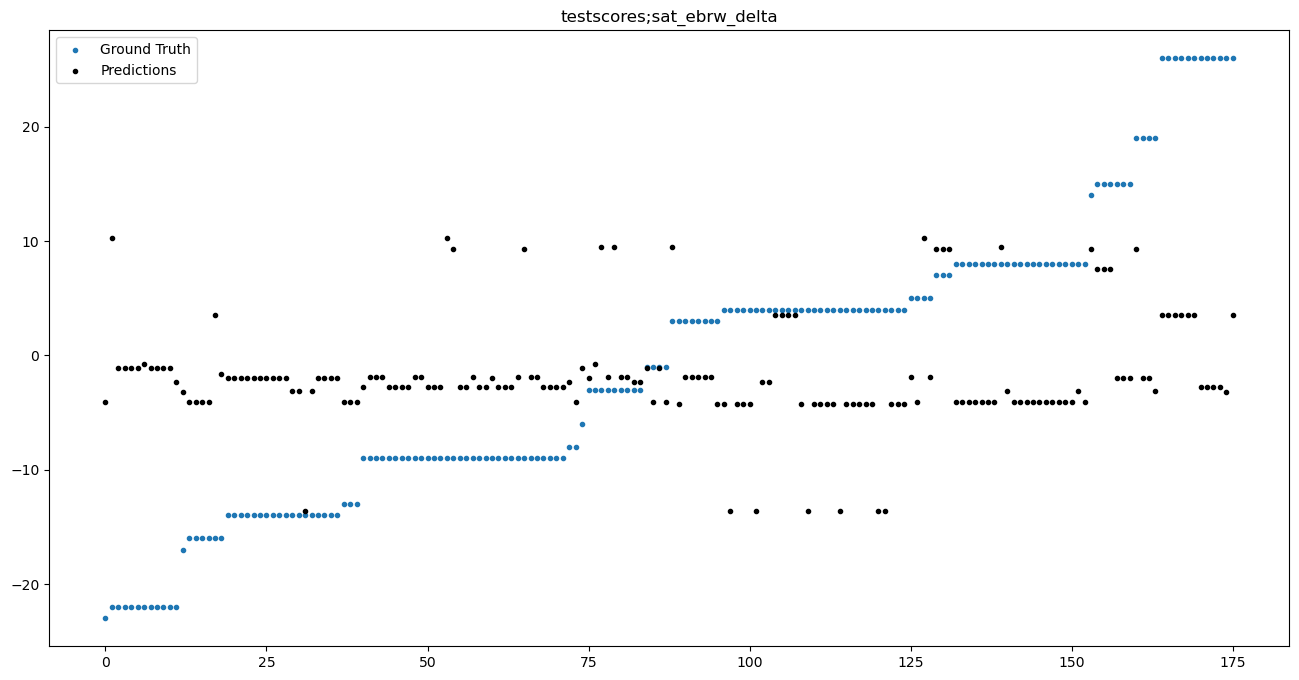

In [35]:
plot_residuals(five_fold_results, None)

<a id='baseline3_model'></a>

## Baseline 3: Predict Math and Reading Scores from Internet Access Data Only

[(Back to top)](#baselines)

In [36]:
FEATURES = ['broadband;wired_over_25',
            'broadband;avg_mbps', 
            'broadband;frac_access', 
            'broadband;lowest_price']

five_fold_results = run_experiment(dataset, 
                                   FEATURES,
                                   TARGETS,
                                   Ridge(alpha=0.5), 
                                   n_splits=5)


Dataset for testscores;sat_math_delta has 176 samples after filtering
Dataset for testscores;sat_ebrw_delta has 176 samples after filtering


### Baseline 3 Training Results

In [37]:
print_results(five_fold_results)

,testscores;sat_math_delta
train_r2,0.1458
train_root_mean_squared_error,11.4075


,testscores;sat_ebrw_delta
train_r2,0.2004
train_root_mean_squared_error,11.1666


<a id='baseline3_results'></a>

### Baseline 3 Testing Results

[(Back to top)](#baselines)

In [38]:
print_results(five_fold_results, splits=['test'])

,testscores;sat_math_delta
test_r2,-0.1038
test_root_mean_squared_error,11.8534


testscores;sat_math_delta: 11.8534


,testscores;sat_ebrw_delta
test_r2,-0.0305
test_root_mean_squared_error,11.5992


testscores;sat_ebrw_delta: 11.5992


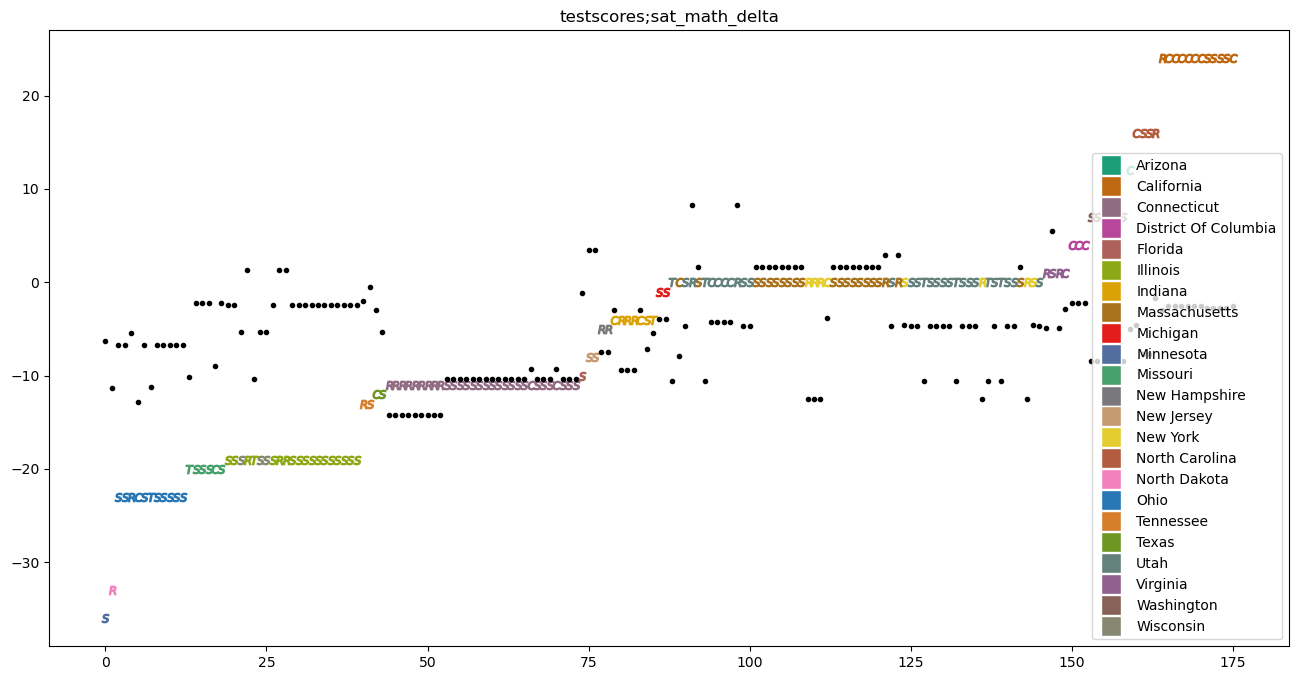

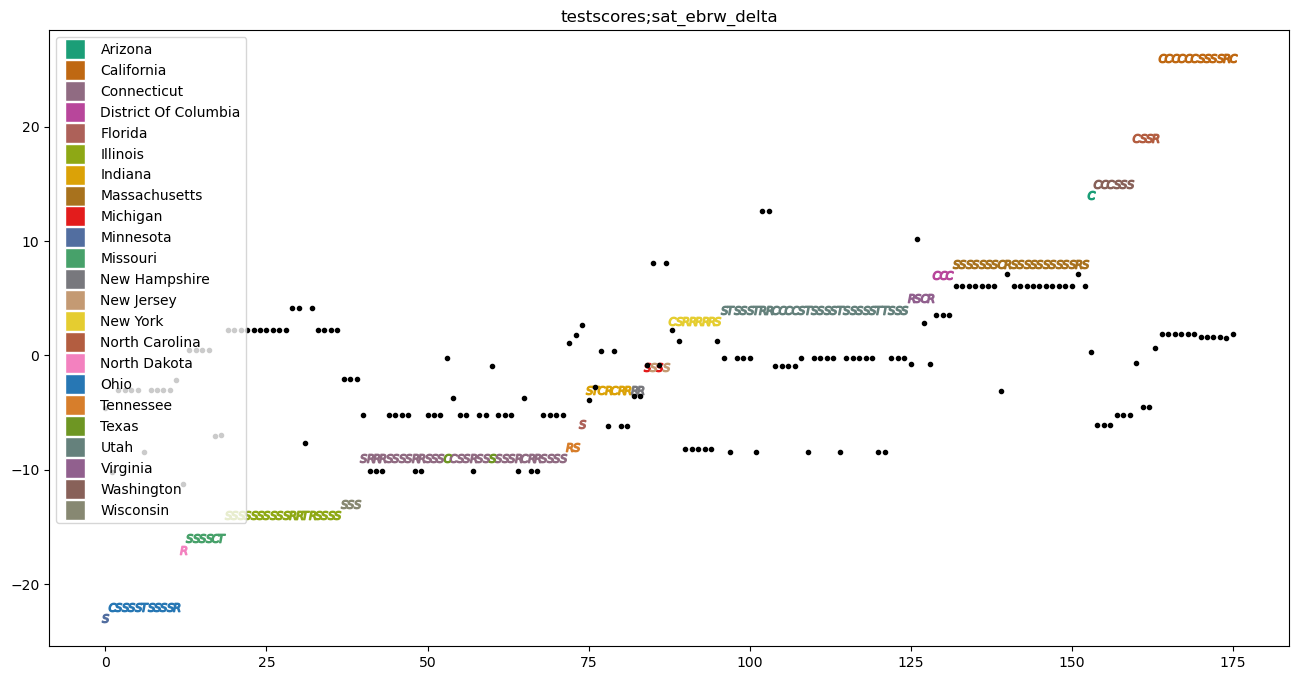

In [39]:
plot_residuals(five_fold_results, dataset)

<a id='baseline4_model'></a>

## Baseline 4: Predict Math and Reading Scores from Socioeconomic Data Only

[(Back to top)](#baselines)

In [40]:
FEATURES = ['districts;pct_black/hispanic', 
            'districts;pct_free/reduced',
            'districts;pp_total_raw']

five_fold_results = run_experiment(dataset, 
                                   FEATURES,
                                   TARGETS,
                                   Ridge(alpha=0.5), 
                                   n_splits=5)


Dataset for testscores;sat_math_delta has 92 samples after filtering
Dataset for testscores;sat_ebrw_delta has 92 samples after filtering


### Baseline 4 Training Results

In [41]:
print_results(five_fold_results)

,testscores;sat_math_delta
train_r2,0.1033
train_root_mean_squared_error,9.8555


,testscores;sat_ebrw_delta
train_r2,0.0773
train_root_mean_squared_error,9.6867


<a id='baseline4_results'></a>

### Baseline 4 Testing Results

[(Back to top)](#baselines)

In [42]:
print_results(five_fold_results, splits=['test'])

,testscores;sat_math_delta
test_r2,-2.9109
test_root_mean_squared_error,12.6915


testscores;sat_math_delta: 12.6915


,testscores;sat_ebrw_delta
test_r2,-2.6111
test_root_mean_squared_error,12.2621


testscores;sat_ebrw_delta: 12.2621


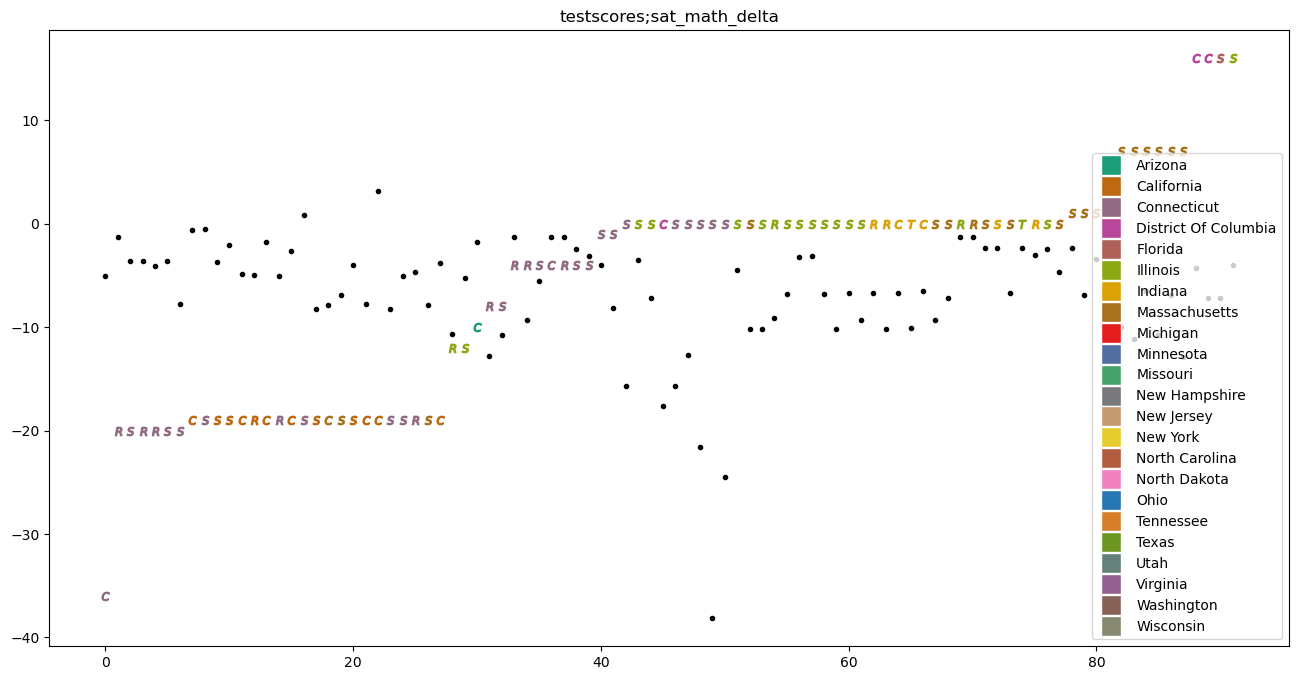

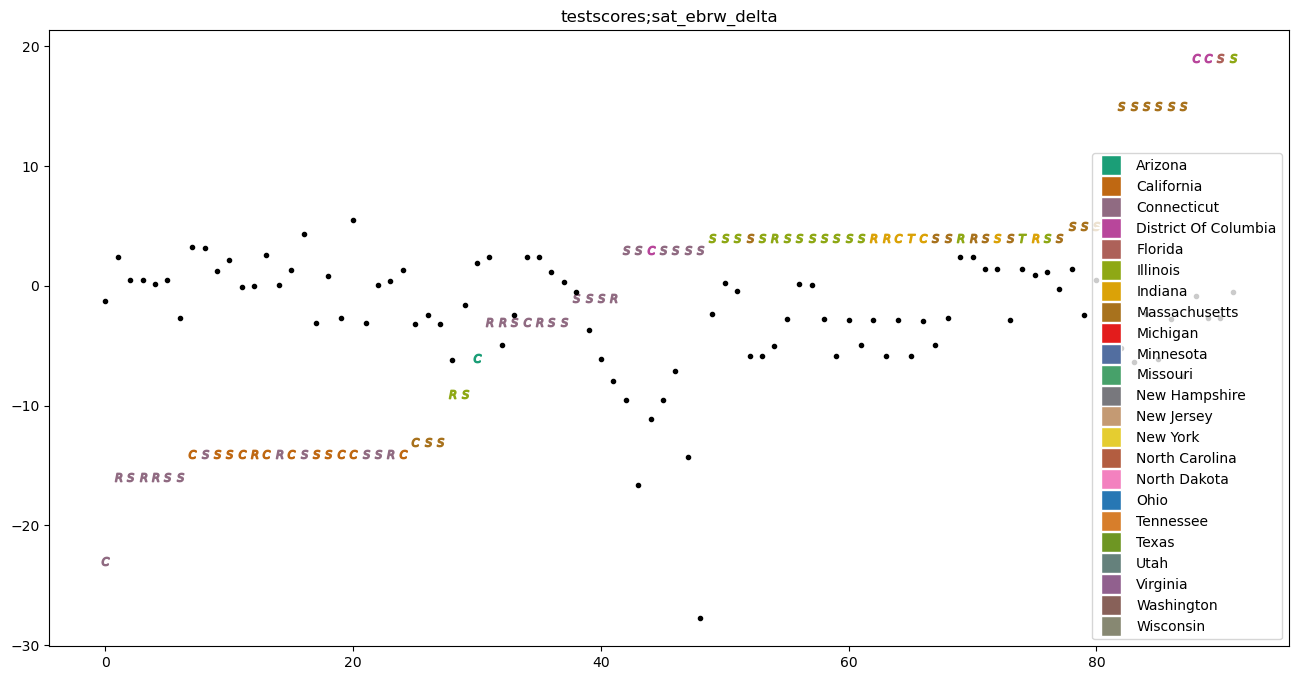

In [43]:
plot_residuals(five_fold_results, dataset)

-----------